In [10]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

F:\Data Science\New folder\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv('C:/Users/LENOVO/Downloads/shampoo_sales.csv', header=0, parse_dates=True, index_col='Month')
series.head()

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [13]:
series.dropna(axis=0, inplace=True)

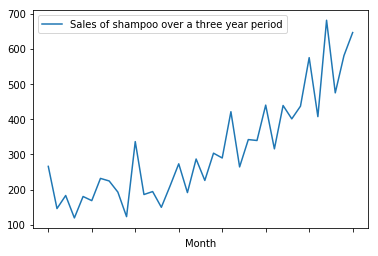

In [14]:
series.plot()
pyplot.show()

In [15]:
### Above Output we can see shampoo sales data trend

In [16]:
X = series.values
X

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3],
       [168.5],
       [231.8],
       [224.5],
       [192.8],
       [122.9],
       [336.5],
       [185.9],
       [194.3],
       [149.5],
       [210.1],
       [273.3],
       [191.4],
       [287. ],
       [226. ],
       [303.6],
       [289.9],
       [421.6],
       [264.5],
       [342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

In [17]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [18]:
train, test = X[0:size], X[size:len(X)]

In [19]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

F:\Data Science\New folder\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
F:\Data Science\New folder\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
F:\Data Science\New folder\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=272.964466, expected=421.600000
predicted=290.313820, expected=264.500000
predicted=349.117712, expected=342.300000
predicted=306.512952, expected=339.700000
predicted=387.376449, expected=440.400000
predicted=348.154255, expected=315.900000
predicted=386.308818, expected=439.300000
predicted=356.082087, expected=401.300000
predicted=446.379462, expected=437.400000
predicted=394.737224, expected=575.500000
predicted=434.915402, expected=407.600000
predicted=507.923547, expected=682.000000
predicted=435.482779, expected=475.300000
predicted=652.743826, expected=581.300000
predicted=546.343519, expected=646.900000
Test MSE: 7547.806


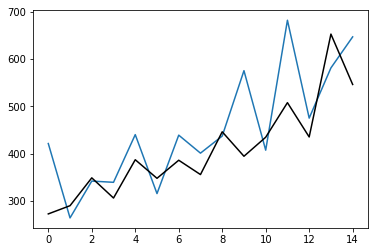

In [20]:
pyplot.plot(test)
pyplot.plot(predictions, color='Black')
pyplot.show()